# Load iris data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
data = sns.load_dataset('iris')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
# split train & test
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:-2] # 반응변수로 numerical var.인 petal_width 사용
y = data.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False, random_state=2023)

# Parametric Regression

## Linear Regrssion

### scikit-learn (LinearRegression) 버전
* fitting만 하면 OK.
* But, p-value 등의 다른 정보 얻으려면 코드가 복잡해짐

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# 모델링 및 예측
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [7]:
# 회귀계수 확인
print(model.coef_)
print(model.intercept_)

[-0.07281459  0.09410956  0.42983666]
-0.33576769783038307


In [8]:
# 결정계수 R^2 확인
print(model.score(X_train, y_train))

0.9625096753191164


### statsmodels 버전
* R과 비슷하게 summary 정보 제공하여 sklearn보다 통계분석 용이함
* Cond. No.(condition number)이 낮으면 다중공선성 有

In [9]:
import statsmodels.api as sm

In [10]:
X_train = sm.add_constant(X_train) #beta_0 절편항 추가

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     736.0
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.49e-61
Time:                        22:41:11   Log-Likelihood:                 70.547
No. Observations:                  90   AIC:                            -133.1
Df Residuals:                      86   BIC:                            -123.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3358      0.148     -2.267      0.026      -0.630      -0.041
sepal_length    -0.0728      0.040     -1.828      0.071      -0.152       0.006
sepal_width      0.0941      0.039      2.437      0.017       0.017       0.171
petal_length     0.4298      0.022     19.600      0.000       0.386       0.473
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.130
Skew:                          -0.065   Prob(JB):                        0.937
Kurtosis:                       3.133   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# predicting
X_test = sm.add_constant(X_test)

pred = model.predict(X_test) # 예측값 반환

## 모형 진단
모형이나 가정에 어떤 문제점이 있나를 알아보는 것

$$ \epsilon_i \sim N(0,\sigma^2), \quad i=1,\cdots,n $$

1. 오차의 등분산성 - residual plot
2. 오차의 정규성 - Q-Q plot / shapiro-wilk test
3. 오차의 독립성 - dubin-watson test
4. 모형의 선형성 - residual plot

Text(0, 0.5, 'residual')

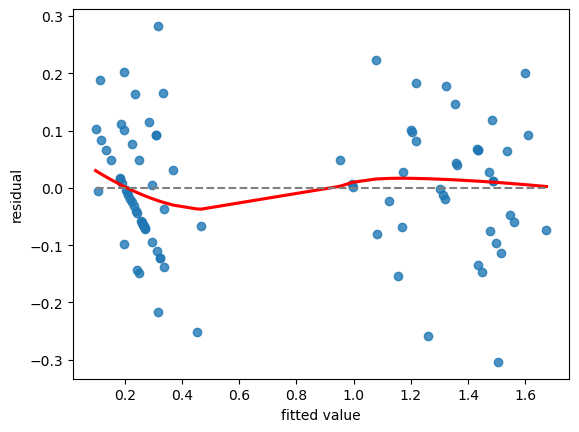

In [12]:
# 오차의 등분산성
# residual plot을 통해 확인
# 적합값에 따라 잔차의 퍼져있는 정도가 다르면 등분산성을 만족하지 않음.
# 특정한 패턴 없이 분포해야 등분산성을 만족함

# 모형의 선형성
# residual plot을 통해 확인
# 모든 적합값에 대한 잔차가 0에 가까워야(제대로 fitted) 모형의 선형성 만족.
# 따라서, 빨간 실선이 점선을 크게 벗어나지 않아야 선형성 만족.

import matplotlib.pyplot as plt
import seaborn as sns

fitted = model.predict(X_train)
residual = y_train - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')
plt.xlabel('fitted value')
plt.ylabel('residual')

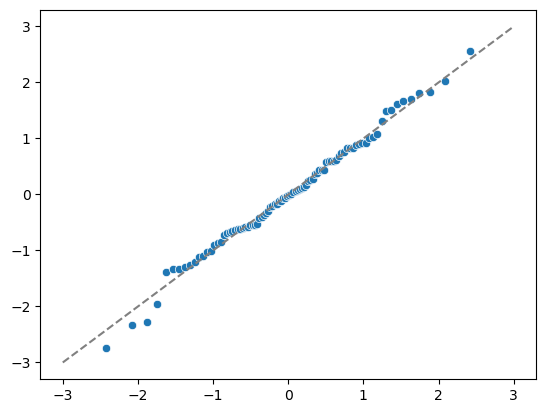

In [13]:
# 오차의 정규성 : Q-Q plot
# Q-Q plot에서 y=x 선을 벗어날수록 정규성 가정 위배

import scipy.stats

sr = scipy.stats.zscore(residual)
(x,y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x=x,y=y)
plt.plot([-3,3], [-3,3], '--', color='grey')

In [14]:
# 오차의 정규성 : shapiro-wilk test
# 귀무가설 : 오차항의 정규성을 만족한다 -> 기각하면 정규성 위반

scipy.stats.shapiro(residual)
# p-value = 0.86 -> 귀무가설 기각X -> 오차항 정규성 만족

ShapiroResult(statistic=0.9920470714569092, pvalue=0.8688433766365051)

In [15]:
# 오차의 독립성
# statsmodel의 summary에서 확인

model.summary()
# 1.5 ~ 2.5 : 독립O
# 0 또는 4에 가까움 : 잔차들이 자기상관 가짐 -> 독립X

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     736.0
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.49e-61
Time:                        22:41:23   Log-Likelihood:                 70.547
No. Observations:                  90   AIC:                            -133.1
Df Residuals:                      86   BIC:                            -123.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3358      0.148     -2.267      0.026      -0.630      -0.041
sepal_length    -0.0728      0.040     -1.828      0.071      -0.152       0.006
sepal_width      0.0941      0.039      2.437      0.017       0.017       0.171
petal_length     0.4298      0.022     19.600      0.000       0.386       0.473
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.130
Skew:                          -0.065   Prob(JB):                        0.937
Kurtosis:                       3.133   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 다중공선성 확인

### 상관계수 및 산점도

              const  sepal_length  sepal_width  petal_length
const           NaN           NaN          NaN           NaN
sepal_length    NaN      1.000000    -0.218404      0.824332
sepal_width     NaN     -0.218404     1.000000     -0.595332
petal_length    NaN      0.824332    -0.595332      1.000000


<Axes: >

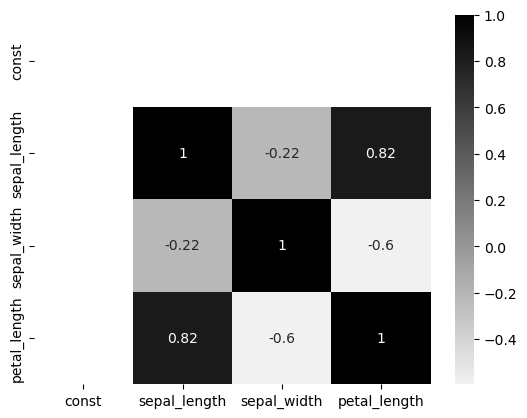

In [16]:
# Correlation Coefficient
print(X_train.corr())

cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(X_train.corr(), annot=True, cmap=cmap)

### VIF (분산팽창요인)

In [17]:
# VIF(Variance Inflation Factors, 분산팽창요인)
# 일반적으로 10이 넘으면 다중공선성이 존재하는 것으로 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
vif = vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,2.414681,sepal_width
1,4.864224,sepal_length
2,7.175256,petal_length
3,154.591676,const


## 다중공선성 해결

### forward, backward, stepwise

In [ ]:
# Forward Selection - 사용자정의함수
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Forward Selection - 내장함수
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

In [ ]:
# Backward Selection - 사용자정의함수
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

# Backward Selection - 내장함수
sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show() # Feature 수에 따른 performance 그래프 그리기

In [ ]:
# Stepwise Selection - 사용자정의함수
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

# Stepwise Selection - 내장함수
sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

### Lasso
* 선형회귀계수에 대한 제약 조건을 추가하여, 과적합을 방지하는 정규화선형회귀모형.
* L1-norm penalty 사용
* Cloase form soluiton 존재하지 않음 (numerical optimization으로 최적해 구함)
* 예측력이 낮은 계수는 0에 수렴 → **변수 선택** 효과
* 변수 간 다중공선성이 높으면 Ridge에 비해 상대적으로 성능 떨어짐.

$$ y = \beta_0 + \sum_{j=1}^p \beta_j x_j + \lambda \sum_{j=1}^n|\beta_j|, \quad \lambda > 0 $$

In [68]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3) #alpha range = [0,1]
lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)

mse = np.mean((pred - y_test)**2)
print('MSE :', mse)

MSE :  0.36813872050185964


In [76]:
# k-fold cross validation to find best lambda
from sklearn.linear_model import LassoCV

cv_model = LassoCV(cv=5, random_state=2023, max_iter=10000)
cv_model.fit(X_train, y_train)

print('best lambda :', cv_model.alpha_)

best lambda : 0.0115330947800032


In [77]:
lassoReg = Lasso(alpha=cv_model.alpha_) #alpha range = [0,1]
lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)

mse = np.mean((pred - y_test)**2)
print('MSE with best lambda :', mse)

MSE of best model : 0.10966546313433843


### Ridge

* L2-norm penalty 사용
* Closed form solution 존재 (미분으로 최적해 구할 수 있음)
* Lasso와 달리, **예측력이 낮은 변수의 크기가 작아지더라도 0이 되지는 않음**.

$$ y = \beta_0 + \sum_{j=1}^p \beta_j x_j + \lambda \sum_{j=1}^n\beta_j^2, \quad \lambda > 0 $$

In [78]:
from sklearn.linear_model import Ridge

## training the model
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(X_train, y_train)
pred = ridgeReg.predict(X_test)

mse = np.mean((pred - y_test)**2)
print('MSE :', mse)

MSE : 0.09090625811512879


In [92]:
# k-fold cross validation to find best lambda
from sklearn.linear_model import RidgeCV

alphas = np.arange(0, 10, 0.2)

cv_model = RidgeCV(cv=5)
cv_model.fit(X_train, y_train)

print('best lambda :', cv_model.alpha_)

best lambda : 1.0


In [94]:
ridgeReg = Ridge(alpha=cv_model.alpha_) #alpha range = [0,1]
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

mse = np.mean((pred - y_test)**2)
print('MSE with best lambda :', mse)

MSE with best lambda : 0.09685880389944347


### Elastic net (lasso + ridge)

* Lasso와 ridge를 절충한 모형
* Lasso의 변수 선택 기능 + Ridge의 다중공선성이 높은 변수에 대한 좋은 성능
* lambda : penalty term의 크기 조절
* alpha : penalty term의 비중 조절


$$ y = \beta_0 + \sum_{j=1}^p \beta_j x
        + \lambda \sum_{j=1}^n (\alpha |\beta_j| + (1-\alpha)\beta_j^2)
        , \quad \lambda > 0 $$

In [96]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5)
ENreg.fit(X_train,y_train)
pred_cv = ENreg.predict(X_test)

mse = np.mean((pred_cv - y_test)**2)
print('MSE :', mse)

MSE : 0.8297255592355693


In [97]:
# k-fold cross validation to find best lambda
from sklearn.linear_model import ElasticNetCV

cv_model = ElasticNetCV(cv=5)
cv_model.fit(X_train, y_train)

print('best lambda :', cv_model.alpha_)

best lambda : 0.021511605583504758


In [98]:
ENreg = ElasticNet(alpha=cv_model.alpha_) #alpha range = [0,1]
ENreg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

mse = np.mean((pred - y_test)**2)
print('MSE with best params :', mse)

MSE with best params : 0.09685880389944347


## Logistic Regression

In [30]:
# Reload tips Data
data = sns.load_dataset('tips')

data['sex']= data['sex'].replace(['Male','Female'],[0,1]) # 남자:0, 여자:1
data['sex'] = data['sex'].astype("int") # type 변경
X = data[["total_bill", "tip", "size"]]
y = data["sex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False, random_state=2023)

In [34]:
# scikit-learn version
from sklearn.linear_model import LogisticRegression

modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

modelLogistic.intercept_ # intercept 반환
modelLogistic.coef_ # coefficient 반환

y_pred= modelLogistic.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
# statsmodel version
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)
y_pred

Optimization terminated successfully.
         Current function value: 0.650456
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    sex   No. Observations:                  146
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                 0.01808
Time:                        22:47:44   Log-Likelihood:                -94.967
converged:                       True   LL-Null:                       -96.715
Covariance Type:            nonrobust   LLR p-value:                    0.3212
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2204      0.543      0.406      0.685      -0.845       1.285
total_bill    -0.0336      0.

146   -0.275533
147   -0.187005
148   -0.025412
149    0.165287
150   -0.265322
         ...   
239   -0.602937
240   -1.266976
241   -0.938582
242   -0.608959
243   -0.561224
Length: 98, dtype: float64

Confusion Matrix
* Accuracy = (TP+TN)/(TP+TN+EP+FN) : 전체 중 제대로 예측한 비율
* Precision = TP/(TP+FP) : 양성으로 예측한 것 중 실제 양성의 비율
* Recall = TP/(TP+FN) : 실제 양성 중에서 양성으로 예측한 것의 비율
* F1 = 2*(Precision * Recall)/(Precision + Recall) : recall, precsion의 조화평균

In [35]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

TP = ConfusionMatrix[1,1] #True positive
TN = ConfusionMatrix[0,0] #True negative
FP = ConfusionMatrix[0,1] #False positive
FN = ConfusionMatrix[1,0] #False negative

Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

[[66  0]
 [32  0]]
Accuracy from confusion matrix is  0.673469387755102


# Nonparametric Regression

## Regression Spline

* spline : a long, thin part that fits into another part of a machine and makes it turn → 곡선들이 서로의 양 끝점에 연결된 것
* 곡선들이 만나는 점 = Knot
* X의 전체 범위에 걸쳐 고차원 다항식(polynomial)을 fitting 하는 대신에, X의 구간별로 끊어서 fitting 함으로써 적합도를 높일 수 있음.

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/wage.csv')
df.head(3)

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [39]:
# Create label and feature
# We only use the feature age to predict wage:
X = df['age']
y = df['wage']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False, random_state=2023)

### Piecewise Constant Fits
출처 : https://www.kaggle.com/code/renanhuanca/regression-splines/notebook

* Fit : Take the mean of the data in each region
* 4 basis function

$$ f(x) = \beta_1 I_{\zeta_1}(x) + \beta_2 I_{\zeta_2}(x) + \beta_3 I_{\zeta_3}(x) + \beta_4 I_{\zeta_4}(x)$$

In [40]:
# dividing the data into 4 bins
df_cut, bins = pd.cut(x_train, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    456
(33.5, 49.0]      834
(49.0, 64.5]      468
(64.5, 80.0]       42
Name: age, dtype: int64

In [41]:
df_steps = pd.concat([x_train, df_cut, y_train], keys=['age','age_cuts','wage'], axis=1)

# create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [42]:
import statsmodels.api as sm

df_steps_dummies.columns = ['17.938-33.5','33.5-49.0','49.0-64.5','64.5-80.0']

# fitting generalized linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# binning validation set into same 4 bins
bin_mapping = np.digitize(x_test, bins).flatten()

X_test = pd.get_dummies(bin_mapping)

# removing any outliers
X_test = pd.get_dummies(bin_mapping).drop([5], axis=1)

# prediction
pred2 = fit3.predict(X_test)

# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, pred2))
print(rms)

40.910137062947506


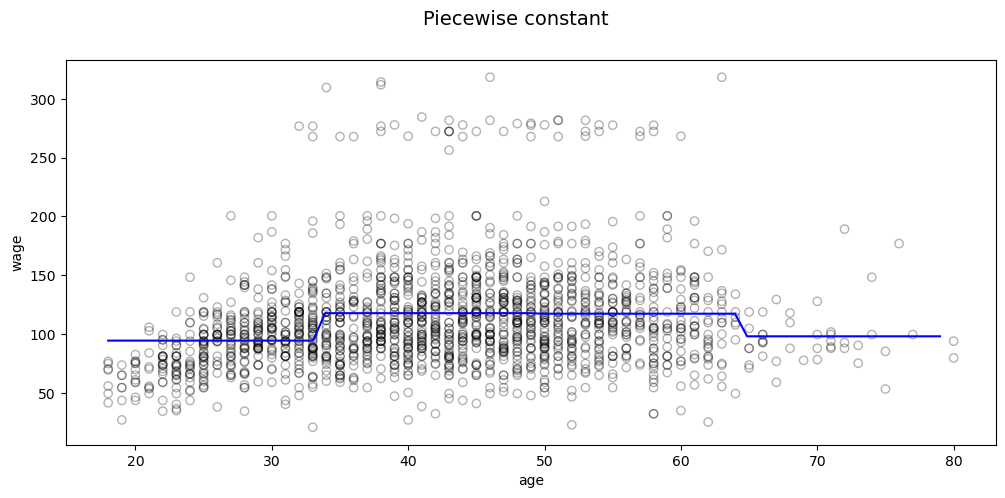

In [44]:
# we sill plot the graph for the 70 observations only
xp = np.linspace(x_test.min(), x_test.max()-1, 70)
bin_mapping= np.digitize(xp, bins)
X_valid_2 = pd.get_dummies(bin_mapping)
pred2 = fit3.predict(X_valid_2)

# visualization
fig, (ax1) =  plt.subplots(1,1, figsize=(12,5))
fig.suptitle("Piecewise constant", fontsize=14)

# scatter plot with polynomial regression line
ax1.scatter(x_train, y_train, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

### Quadratic Spline

* Fit : Take the second polynomial model with the data in each region

$$ f(x) = \beta_0 + \beta_1 x + \beta_2 x^2
            + b_1(x-\zeta_1)^2 + b_2(x-\zeta_2)^2 + b_3(x-\zeta_3)^2 $$

In [46]:
# Generating cubic spline with 3 knots at 25, 40 and 60
from patsy import dmatrix

transformed_x = dmatrix(
                "bs(train, knots=(25,40,60), degree=2, include_intercept=False)", 
                {"train": x_train},return_type='dataframe')

transformed_x.head()

,Intercept,"bs(train, knots=(25, 40, 60), degree=2, include_intercept=False)[0]","bs(train, knots=(25, 40, 60), degree=2, include_intercept=False)[1]","bs(train, knots=(25, 40, 60), degree=2, include_intercept=False)[2]","bs(train, knots=(25, 40, 60), degree=2, include_intercept=False)[3]","bs(train, knots=(25, 40, 60), degree=2, include_intercept=False)[4]"
0,1.0,0.000000,0.000000,0.000000,0.00000,0.0
1,1.0,0.745826,0.233766,0.000000,0.00000,0.0
2,1.0,0.000000,0.321429,0.647321,0.03125,0.0
3,1.0,0.000000,0.412857,0.575893,0.01125,0.0
4,1.0,0.000000,0.142857,0.732143,0.12500,0.0


In [55]:
# fitting generalized linear model on transformed dataset
fit1 = sm.GLM(y_train, transformed_x).fit()

# predictions on both splines
pred1 = fit1.predict(dmatrix("bs(test, knots=(25,40,60), degree=2, include_intercept=False)",
                             {"test":x_test}, return_type='dataframe'))

# calculating rmse
rms1 = sqrt(mean_squared_error(y_test, pred1))
print(rms1)

43.332774328854235


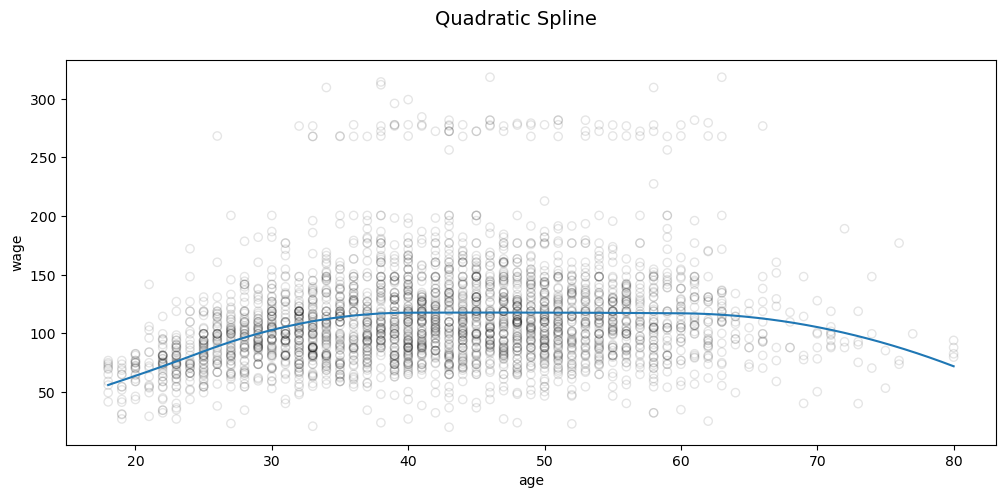

In [126]:
# we wil plot the graph for 70 observations only
xp = np.linspace(valid_x.min(), valid_x.max(), 70)

# make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), degree=2, include_intercept=False)",
                             {"xp":xp}, return_type='dataframe'))

# visualization
fig, (ax1) =  plt.subplots(1,1, figsize=(12,5))
fig.suptitle("Quadratic Spline", fontsize=14)

# scatter plot with polynomial regression line
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1)

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

### Cubic Spline
* https://www.kirenz.com/post/2021-12-06-regression-splines-in-python/regression-splines-in-python/
* https://direction-f.tistory.com/86

* Fit : Take the third polynomial model with the data in each region

$$ f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3
            + b_1(x-\zeta_1)^3 + b_2(x-\zeta_2)^3 + b_3(x-\zeta_3)^3 $$

In [48]:
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix(
                "bs(train, knots=(25,40,60), degree=3, include_intercept=False)", 
                {"train": x_train},return_type='dataframe')

transformed_x.head()

,Intercept,"bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.559911,0.403778,0.033395,0.000000,0.000000,0.0
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
3,1.0,0.000000,0.167109,0.633167,0.198880,0.000844,0.0
4,1.0,0.000000,0.034014,0.508194,0.426542,0.031250,0.0


In [50]:
# fitting generalized linear model on transformed dataset
fit1 = sm.GLM(y_train, transformed_x).fit()

# predictions on both splines
pred1 = fit1.predict(dmatrix("bs(test, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"test":x_test}, return_type='dataframe'))

# calculating rmse
rms1 = sqrt(mean_squared_error(y_test, pred1))
print(rms1)

40.550845214164404


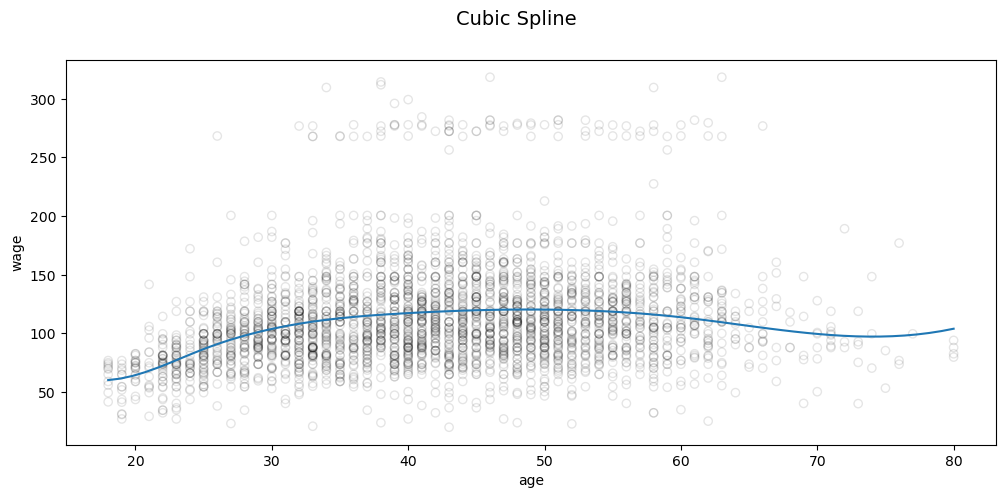

In [51]:
# we wil plot the graph for 70 observations only
xp = np.linspace(x_test.min(), x_test.max(), 70)

# make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"xp":xp}, return_type='dataframe'))

# visualization
fig, (ax1) =  plt.subplots(1,1, figsize=(12,5))
fig.suptitle("Cubic Spline", fontsize=14)

# scatter plot with polynomial regression line
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1)

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

### Natural Cubic Spline
출처 : https://www.kirenz.com/post/2021-12-06-regression-splines-in-python/regression-splines-in-python/

In [52]:
transformed_x = dmatrix(
                "cr(train, knots=(25,40,60))",
                {"train": x_train}, return_type='dataframe')

transformed_x.head()

,Intercept,"cr(train, knots=(25, 40, 60))[0]","cr(train, knots=(25, 40, 60))[1]","cr(train, knots=(25, 40, 60))[2]","cr(train, knots=(25, 40, 60))[3]","cr(train, knots=(25, 40, 60))[4]"
0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.103590,0.918964,-0.026518,0.004757,-0.000793
2,1.0,0.087676,-0.248611,0.964859,0.232166,-0.036090
3,1.0,0.064804,-0.183756,1.015461,0.123514,-0.020023
4,1.0,0.091488,-0.259420,0.691592,0.546608,-0.070268


In [53]:
# fitting generalized linear model on transformed dataset
fit1 = sm.GLM(y_train, transformed_x).fit()

# predictions on both splines
pred1 = fit1.predict(dmatrix("cr(train, knots=(25,40,60))",
                    {"train": x_test}, return_type='dataframe'))

# calculating rmse
rms1 = sqrt(mean_squared_error(y_test, pred1))
print(rms1)

40.48029557510685


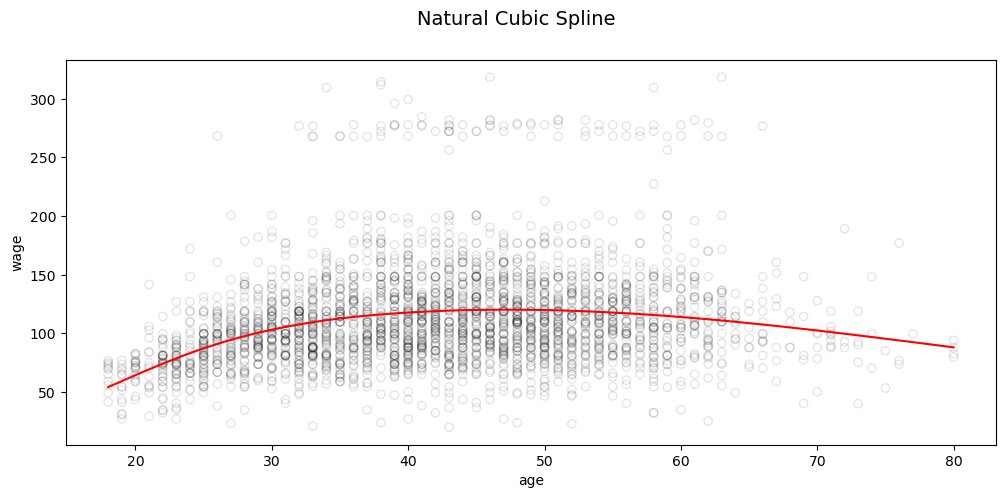

In [54]:
# we wil plot the graph for 70 observations only
xp = np.linspace(x_test.min(), x_test.max(), 70)

# make some predictions
pred1 = fit1.predict(dmatrix("cr(xp, knots=(25,40,60))",
                             {"xp":xp}, return_type='dataframe'))

# visualization
fig, (ax1) =  plt.subplots(1,1, figsize=(12,5))
fig.suptitle("Natural Cubic Spline", fontsize=14)

# scatter plot with polynomial regression line
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, color='red')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()